# 情報システム工学演習 画像処理 OpenCVチュートリアル

OpenCVを使った画像処理の演習です。まずはこのチュートリアルで基礎の基礎を学んでいきましょう。
ちなみに、OpenCVの公式チュートリアルが https://docs.opencv.org/4.x/d9/df8/tutorial_root.html にあるので、こちらも活用してください。

---
## 準備
インストールについては```README.md```を参照してください。

In [ ]:
import cv2
import numpy as np  # PythonのOpenCVでは、画像はnumpyのarrayとして管理される
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

# 画像表示用の関数（jupyter notebookでインラインで表示したい時向け）
def imshow_inline(img):
    if img.ndim == 3:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # OpenCVの画像は、BGRの順に色が並んでいるので
        #    display(Image.fromarray(img))
    else:
        display(Image.fromarray(img))

---
## 画像の読み込み・書き込み編

In [ ]:
# 画像ファイルの読み込み・書き込み
img = cv2.imread("sample/sample.jpg")
# img = cv2.imread("sample/sample.jpg",cv2.IMREAD_GRAYSCALE)  # 強制的にグレースケール（白黒画像）として読み込む場合

# てきとうな処理（リサイズしてみた）
#dst = cv2.resize(img,dsize=None,fx=0.5,fy=0.5)  # 縦横半分
dst = cv2.resize(img,dsize=(512,256))  # 指定したサイズ

# 画像の書き込み
cv2.imwrite("out.png",dst)

# インライン表示する場合
#imshow_inline(img)
#imshow_inline(dst)

# 新しいウインドウを開いて表示する場合（ウインドウを閉じるか、なにかキーを押すと終了）
cv2.namedWindow('src') # 指定されたタイトルのウインドウを開く
cv2.imshow('src',img)  # 指定されたタイトルのウインドウに画像を表示
cv2.namedWindow('dst') # 指定されたタイトルのウインドウを開く
cv2.imshow('dst',dst)  # 指定されたタイトルのウインドウに画像を表示
cv2.waitKey(0)           # キーが押されるまで{引数}[ms]の間待つ（0の場合はずっと待つ）
cv2.destroyAllWindows()  # ウインドウを閉じる。!!!jupyter上の場合、これを忘れるとフリーズする!!!

In [ ]:
# 動画の読み込み
cap = cv2.VideoCapture('sample/sample.avi')

end_flag, frame = cap.read()  # 最初のフレームを読み込み
height, width, channels = frame.shape

cv2.namedWindow('image') # 'image'というタイトルのウインドウを開く

while end_flag == True:
    cv2.imshow('image',frame)  # 'image'というタイトルのウインドウに画像を表示

    key = cv2.waitKey(30) # キーが押されるまで{引数}[ms]の間待つ（0の場合はずっと待つ）
    if key == 27 or key == ord('q'):  # qかESCが押されたら途中で終了
        break

    end_flag, frame = cap.read() # 次のフレームを読み込み

cv2.destroyAllWindows()  # ウインドウを閉じる
cap.release()

In [ ]:
# webカメラの読み込み
# !!!注意!!! 当然ですが、カメラがつながっていないとエラーになります

# 引数はデバイスの順番。複数のカメラがつながっている場合は1などに変えると変わる
cap = cv2.VideoCapture(0)
#cap = cv2.VideoCapture(1)

end_flag, frame = cap.read()  # 最初のフレームを読み込み
height, width, channels = frame.shape

cv2.namedWindow('image') # 'image'というタイトルのウインドウを開く

while end_flag == True:
    cv2.imshow('image',frame)  # 'image'というタイトルのウインドウに画像を表示

    key = cv2.waitKey(30) # キーが押されるまで{引数}[ms]の間待つ（0の場合はずっと待つ）
    if key == 27 or key == ord('q'):  # qかESCが押されたら途中で終了
        break

    end_flag, frame = cap.read() # 次のフレームを読み込み

cv2.destroyAllWindows()  # ウインドウを閉じる
cap.release()


---
## 画素へのアクセスと色の操作編

Tips:
- 画像は配列。PythonのOpenCVでは、画像はnumpyの配列として保持される。
- 画像のサイズを縦h, 横w, チャンネル数cで表すと、
    - グレースケール（1ch）画像の場合、(h,w)の2次元のnumpy配列
    - カラー画像（3ch, BGRの順で色が並ぶ）の場合、(h,w,c)の3次元のnumpy配列
        - カラー画像の画素のチャンネルは、それぞれ青・緑・赤の色の強さを表す。
- 原点は左上。縦軸をy、横軸をxとすると、左からx、上からy画素目の画素へのアクセスは`img[y,x] (img[y][x]でもOK)`（1ch画像の場合）
- 配列の各要素には0~255の8bit (uint8)が格納されており、大きい値が明るい（あるいは色が強い）画素を表す。
- 画像全体の画素に対する操作は、for文の2重ループ（それぞれ縦横の座標を表す）で走査する方法がある
    - Pythonのfor文は遅いので、numpyやOpenCVの関数を使った効率化を積極的に検討すると良い。

In [ ]:
# グレースケール画像の操作
img_color = cv2.imread("sample/sample.jpg")
print("color (BGR): ",img_color.shape, ", type: ", img_color.dtype)

img_gray = cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY) # グレイスケールに変換
print("grayscale: ",img_gray.shape, ", type: ", img_color.dtype)

# 各画素をスキャンして、条件にあった画素だけ書き換える（効率悪い。おそい。）
out1 = img_gray.copy()
out2 = img_gray.copy()
for y in range(img_gray.shape[0]):
    for x in range(img_gray.shape[1]):

        # 例1: 画素値が128よりも小さい場合に全部255（白）にする
        if out1[y,x] < 128:
            out1[y,x] = 255

        # 例2: y座標が30以上110未満の部分を黒塗り
        if 30 <= y < 110:
            out2[y,x] = 0

# 例1は、numpyを使って以下のようにも実現できる。はやい。
out_numpy = np.where(img_gray<128, 255, img_gray)

# 例2は、numpyの配列操作で以下のように書ける。はやい。
out2_numpy = img_gray.copy()
out2_numpy[30:110,:] = 0

imshow_inline(img_gray)
imshow_inline(out1)
imshow_inline(out2)

In [ ]:
# カラー画像の操作
img = cv2.imread("sample/sample.jpg")

out = np.zeros((img.shape[0],img.shape[1],img.shape[2]),np.uint8)   # 全画素0の画像
for y in range(img.shape[0]):
    for x in range(img.shape[1]):

        # R（赤成分）だけ大きい部分のみ画素値を残し、その他は黒(0,0,0)にする
        if img[y,x,0] < 128 and img[y,x,1] < 128 and img[y,x,2] > 128:
            out[y,x,0] = img[y,x,0]
            out[y,x,1] = img[y,x,1]
            out[y,x,2] = img[y,x,2]
        else:
            out[y,x,0] = 0
            out[y,x,1] = 0
            out[y,x,2] = 0

# OpenCVとnumpyを使って以下のようにも書ける
mask = cv2.inRange(img, np.array([0,0,128]), np.array([128,128,255]))
mask = np.dstack((mask,mask,mask))  # 3chにしたいので
out_numpy = cv2.bitwise_and(img, mask)
#out_numpy = img * (mask/255).astype(np.uint8)  # これでも良い

imshow_inline(img)
imshow_inline(out)
imshow_inline(out_numpy)

In [ ]:
# カラー画像の操作（HSV編）
img = cv2.imread("sample/sample.jpg")

# 色の抽出には、HSV色空間が直感的で適している。
## H (Hue): 色相（本来は0~359度の色相環だが、画素値の上限から2で割って0~179になる。0度で赤。）
## S (Saturation): 彩度（大きいほうが鮮やか。0~255）
## V (Value): 明度（大きいほど明るい。0~255）
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

mask = np.zeros((img_hsv.shape[0],img_hsv.shape[1]),np.uint8)   # 全画素0のマスクをつくった
for y in range(img_hsv.shape[0]):
    for x in range(img_hsv.shape[1]):

        # 赤い部分（Hが0~15か165~179の領域）を選ぶ
        # 彩度と明度はある程度でかいほうが良い、とした例。
        if (img_hsv[y,x,0] <= 15 and img_hsv[y,x,1] > 160 and img_hsv[y,x,2] > 128) or \
                (img_hsv[y,x,0] >= 165 and img_hsv[y,x,1] > 160 and img_hsv[y,x,2] > 128):
            mask[y,x] = 255   # 「赤い」部分だけ255になるマスク

mask = np.dstack((mask,mask,mask))  # 3chにしたいので
out = cv2.bitwise_and(img, mask)  # マスクをかける

imshow_inline(img)
imshow_inline(out)

---
## 画像の統計量

画像のヒストグラム（度数分布）を計算するなどが代表的。

In [ ]:
img = cv2.imread("sample/sample.jpg")

hist_B = cv2.calcHist([img],channels=[0],mask=None,histSize=[256],ranges=[0,256])  # B:0, G:1, R:2
hist_G = cv2.calcHist([img],channels=[1],mask=None,histSize=[256],ranges=[0,256])  # B:0, G:1, R:2
hist_R = cv2.calcHist([img],channels=[2],mask=None,histSize=[256],ranges=[0,256])  # B:0, G:1, R:2

fig, ax = plt.subplots()
x = range(0,256)
x_axis = np.array(x)
ax.plot(x_axis, np.array(hist_B), label='B', color='blue')
ax.plot(x_axis, np.array(hist_G), label='G', color='green')
ax.plot(x_axis, np.array(hist_R), label='R', color='red')
ax.legend(loc=0)    # 凡例

---
## 画像のフィルタリング

画像の編集や特徴の抽出に使える。ここでは、画像を「ぼかす」例と、「エッジ」を抽出する例を紹介する。

In [ ]:
# 画像を「ぼかす」

img = cv2.imread("sample/wani.png")
dst = cv2.GaussianBlur(img,ksize=(21,21),sigmaX=7)

print("input")
imshow_inline(img)

print("blurred")
imshow_inline(dst)

In [ ]:
# 画像の変化量（勾配）を計算する

img = cv2.imread("sample/prims.png")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # グレイスケールに変換

grad_x = cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=5) # x方向の変化の大きな点（縦方向のエッジ）を検出
grad_y = cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize=5) # y方向の変化の大きな点（横方向のエッジ）を検出

# 勾配（画素値の変化）の強さと方向を計算する。angle: [0,360)
magnitude, angle = cv2.cartToPolar(grad_x, grad_y,angleInDegrees=True)

print("input")
imshow_inline(img_gray)

print("gradient magnitude and direction")

fig, ax = plt.subplots()
im = ax.imshow(magnitude)
fig.colorbar(im, ax=ax)
plt.show()

fig, ax = plt.subplots()
im = ax.imshow(angle)
fig.colorbar(im, ax=ax)
plt.show()


In [ ]:
# 画像のエッジを抽出する
img = cv2.imread("sample/prims.png")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # グレイスケールに変換

# 勾配計算の応用として、エッジっぽい点のみを検出する手法もある。「エッジっぽい点」のみ画素値を255、それ以外を0とした画像が出力される。
edge_canny = cv2.Canny(img_gray,80,30)  # 第2、第3引数はしきい値。小さくするほど細かいエッジが出る。

print("edge image")
imshow_inline(edge_canny)

# 抽出されたエッジを使って直線を検出することもできる。
draw = img.copy()
lines = cv2.HoughLinesP(edge_canny,1.0,np.pi/180.0,30,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]   # 始点(x1,y1), 終点(x2,y2)の直線
    cv2.line(draw,(x1,y1),(x2,y2),(0,0,255),2)

print("lines")
imshow_inline(draw)

---
## 部分画像の操作
numpyの要素アクセス方法をうまく使うと、画像の一部分（region of interest (ROI)）を取り出して簡単に処理できる。

(512, 512, 3)


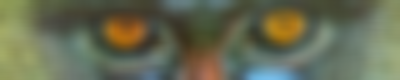

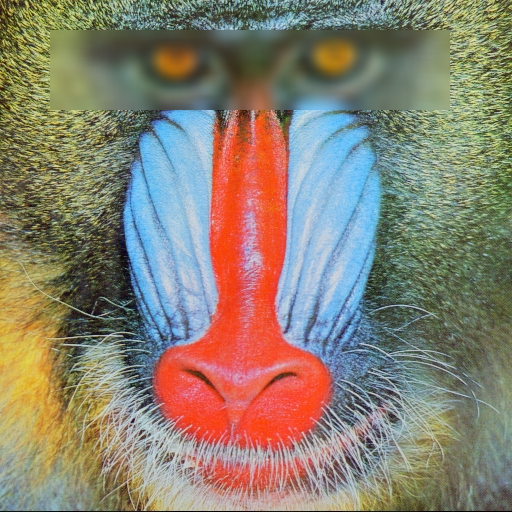

In [21]:
img = cv2.imread("sample/sample.jpg")

img_roi = img[30:110,50:450,:]  #yが30~110, xが50~450, cは全部、の領域を取り出す
img[30:110,50:450,:] = cv2.GaussianBlur(img_roi,ksize=(21,21),sigmaX=7) # ぼかして、元の領域に上書きする

imshow_inline(img_roi)
imshow_inline(img)

---
## 画像の変形

座標(x,y)を操作することで、画像を変形（ワーピング）することができる。詳しくは、射影変換（ホモグラフィ変換）を調べてみよう

以下は、2つの画像を張り合わせる例。4組の対応点を指定し、その前後の変換（ホモグラフィ行列）を計算して変形する。

In [ ]:
# imgをrefに張り合わせることを考える
ref = cv2.imread("sample/pano_ref.jpg") # ベースとなる画像（BGR）
src = cv2.imread("sample/pano_src.jpg") # 変換する画像（BGR）

print("ref")
imshow_inline(ref)
print("src")
imshow_inline(src)

pts_ref = np.float32([[923,156],[1281,143],[1276,760],[916,745]]) # refの点(x', y')
pts_src = np.float32([[88,163],[438,190],[437,760],[78,782]])  # srcの点(x, y)

# 横幅2倍の画像を作って、そこに貼り付けることにした。配列作成時のshapeの設定はw,h,cの順なので注意
dst = np.zeros((src.shape[0],src.shape[1]*2,3))
dst[:,0:ref.shape[1],:] = ref # 左半分にrefをコピー
H = cv2.getPerspectiveTransform(pts_src,pts_ref)  # 最小二乗法によるホモグラフィ行列の推定（img -> refへの変換）
src_warped = cv2.warpPerspective(src, H, (src.shape[1]*2,src.shape[0]), flags=cv2.INTER_NEAREST) # ホモグラフィ行列を使ったワーピング

mask = np.where(src_warped==0,0,1).astype(np.uint8) # 変換後srcの値がある場所が1になるマスク画像を作る
dst = dst*(1-mask) + src_warped*mask  # アルファブレンディング
dst = dst.astype(np.uint8)  # uint8に変換

print("dst")
imshow_inline(dst)

---
## 画像の対応付け

画像の同じ部分はどこか？を探したい。そんな時は対応付けが便利。
画像上の特徴的な点を探し、それら同士のマッチングを行っている。

https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html

In [ ]:
# imgとref間のマッチングをする
ref = cv2.imread("sample/pano_ref.jpg")
src = cv2.imread("sample/pano_src.jpg")

# ここでは、ORBという特徴点・特徴量を使ってみる。
orb = cv2.ORB_create()

# 各画像に対する特徴点（keypoint）とそれに付随する特徴量（descriptor）の計算
kp_ref, des_ref = orb.detectAndCompute(ref, None)
kp_src, des_src = orb.detectAndCompute(src, None)

# マッチング。特徴量の性質から、ハミング距離を使う。
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(des_ref,des_src)

# 全対応を可視化。対応づいた点同士が線で結ばれる。
corr_disp = cv2.drawMatches(ref,kp_ref,src,kp_src,matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
imshow_inline(corr_disp) # 表示

---
## ユーザ入力の取得・描画
OpenCVでは、namedWindow上でのマウスやキーボード入力の取得が可能

また、画像上への描画関数も実装されている。丸以外に、直線（```cv2.line```）、長方形（```cv2.rectangle```）なども。

画像上での文字描画も可能。興味があれば調べてみよう（```cv2.putText```）

In [ ]:
img = cv2.imread("sample/sample.jpg")
draw = img.copy()

# マウスコールバック関数。マウスイベントが発生すると呼ばれる
def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(draw,(x,y),10,(0,255,0), 2)
        print("left press: (", x, ",", y, ")")
    if event == cv2.EVENT_RBUTTONDOWN:
        cv2.circle(draw,(x,y),10,(255,0,0), 2)
        print("right press: (", x, ",", y, ")")
    if event == cv2.EVENT_LBUTTONUP:
        print("left up: (", x, ",", y, ")")
    if event == cv2.EVENT_RBUTTONUP:
        print("right up: (", x, ",", y, ")")

# トラックバーのコールバック関数。トラックバーが動くと呼ばれる
def trackbar_callback(pos):
    print("trackbar: ", pos)

cv2.namedWindow("window")
cv2.setMouseCallback("window", mouse_callback)  # マウスコールバック関数の設定
cv2.createTrackbar("trackbar1","window",0,100,trackbar_callback) # トラックバーの追加

key = 0
while True:
    cv2.imshow("window",draw)  # 'image'というタイトルのウインドウに画像を表示

    # キーボード入力はcv2.waitKeyで取得する
    key = cv2.waitKey(30) # キーが押されるまで{引数}[ms]の間待つ（0の場合はずっと待つ）
    if key == 27 or key == ord('q'):  # qかESCが押されたら途中で終了
        break

cv2.destroyAllWindows()  # ウインドウを閉じる


---
## 機械学習による物体検出
ここでは、学習済みHaar-Cascade特徴を使った顔検出を紹介する。それ以外の学習済み特徴も、`haarcascades`ディレクトリ以下にある。
目鼻口などもあるので遊んでみると良い。

https://docs.opencv.org/4.x/db/d28/tutorial_cascade_classifier.html


In [ ]:
# 学習済みファイルの入力
face_cascade_file  = "haarcascades/haarcascade_frontalface_default.xml"
face_cascade = cv2.CascadeClassifier(face_cascade_file)

img = cv2.imread("sample/face.png")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_list = face_cascade.detectMultiScale(img_gray, minSize=(30, 30))   # 顔検出
#print(face_list)

for (x, y, w, h) in face_list:  # 検出した顔
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 225), thickness = 3)  # 顔の枠を描く

imshow_inline(img) # 表示

---
## 深層学習

深層学習を使うと、より精度の高い物体検出や、精度の高い領域分割など、様々な応用が実現できる。
OpenCVでは、一般的な深層学習ライブラリ（TensorflowやPytorchなど）の学習済みモデルを読み込んで実行できる（が、多くの場合、あえてOpenCVを通して実行する必要はない）。

環境の制約（GPUが必要な場合が多い）などがあるので、興味のある学生は各自以下などから調べてみると良い。

https://github.com/opencv/opencv/tree/4.x/samples/dnn

---
## Next Step
`08D12345.ipynb`に課題実装用テンプレートがあるので、なにか作ってみよう。

### FAQ

**何を作ればよいか思いつかない**

`doc`ディレクトリ以下に、ちょうど良さそうな例をいくつか紹介したスライドを用意したので、それらに取り組んでも良い。
ただし、それらにとらわれず、自由な発想で取り組むことをおすすめする。

**どれくらいの規模感のものを作れば良い？**

小さいもので構わない。上記のチュートリアルの内容を組み合わせた、あるいは少々書き換えただけのようなものでも、その有用性や実装内容がレポートで十分に説明されていれば問題ない。
ちなみに、`tutorial.ipynb`はあくまで参考資料の一つ、という立ち位置である。
よって、チュートリアルに記載されたコードを使う場合、それ自体の説明もきちんとレポート中に含めること。

**こういうのが作りたいんだけど、どのように実装すれば良いかわからない**

大倉（[okura@ist.osaka-u.ac.jp](okura@ist.osaka-u.ac.jp)）までお気軽にご相談を。


---